In [9]:
import os
import cv2
import torch
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# View data

In [10]:
data_path = os.path.join(os.path.dirname(os.getcwd()), "processed_data", "livecells")
ls_img_path = glob(os.path.join(data_path, "images", "*.npy"))
ls_img_path = sorted(ls_img_path)
n_img = len(ls_img_path)
print(f"Number of images: {n_img}")

Number of images: 1624


In [11]:
ls_mask_path = glob(os.path.join(data_path, "labels", "*.npy"))
ls_mask_path = sorted(ls_mask_path)
n_mask = len(ls_mask_path)
print(f"Number of masks: {n_mask}")

Number of masks: 1624


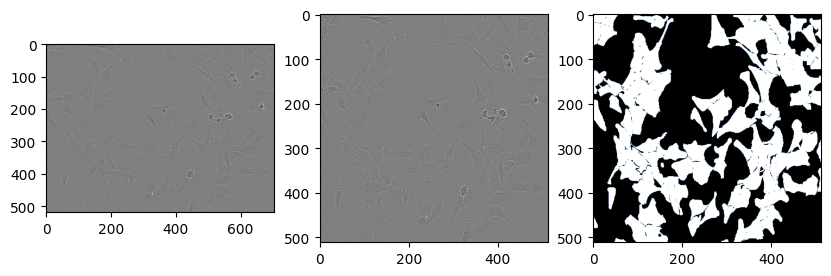

In [48]:
# Load image
idx_path = 10
img_path = ls_img_path[idx_path].replace("processed_data", "data").replace("images", "livecell_train_val_images").replace(".npy", ".tif")
img_origin = cv2.imread(img_path)
img_origin = cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB)

img = np.load(ls_img_path[idx_path])
mask = np.load(ls_mask_path[idx_path])

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].imshow(img_origin, cmap="bone")
ax[1].imshow(img, cmap="bone")
ax[2].imshow(mask, cmap="bone")

In [5]:
import pandas as pd

pd_mask = pd.DataFrame(mask)
pd_mask.describe()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,...,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.093750,0.134766,0.152344,0.156250,0.156250,0.152344,0.148438,0.148438,0.130859,0.101562,...,0.160156,0.152344,0.134766,0.113281,0.087891,0.056641,0.056641,0.054688,0.052734,0.050781
std,0.291766,0.341807,0.359705,0.363447,0.363447,0.359705,0.355881,0.355881,0.337576,0.302368,...,0.367110,0.359705,0.341807,0.317246,0.283413,0.231381,0.231381,0.227592,0.223721,0.219765
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Dataset creation

In [22]:
class LiveCellsDataset(torch.utils.data.Dataset):

    def __init__(self, data_path):
        self.data_path = data_path

        # image path
        ls_img_path = glob(os.path.join(data_path, "images", "*.npy"))
        self.ls_img_path = sorted(ls_img_path)

        # mask path
        ls_mask_path = glob(os.path.join(data_path, "labels", "*.npy"))
        self.ls_mask_path = sorted(ls_mask_path)

        # number of items
        self.n_items = len(self.ls_img_path)

    def __len__(self):
        return self.n_items
    
    def __getitem__(self, idx):
        img = np.load(ls_img_path[idx])
        mask = np.load(ls_mask_path[idx])

        img = torch.tensor(img).permute(2, 0, 1)
        mask = torch.tensor(mask).unsqueeze(0)
        return img, mask

In [23]:
data_path = os.path.join(os.path.dirname(os.getcwd()), "processed_data", "livecells")
dataset = LiveCellsDataset(data_path)

In [26]:
img.shape

torch.Size([3, 512, 512])

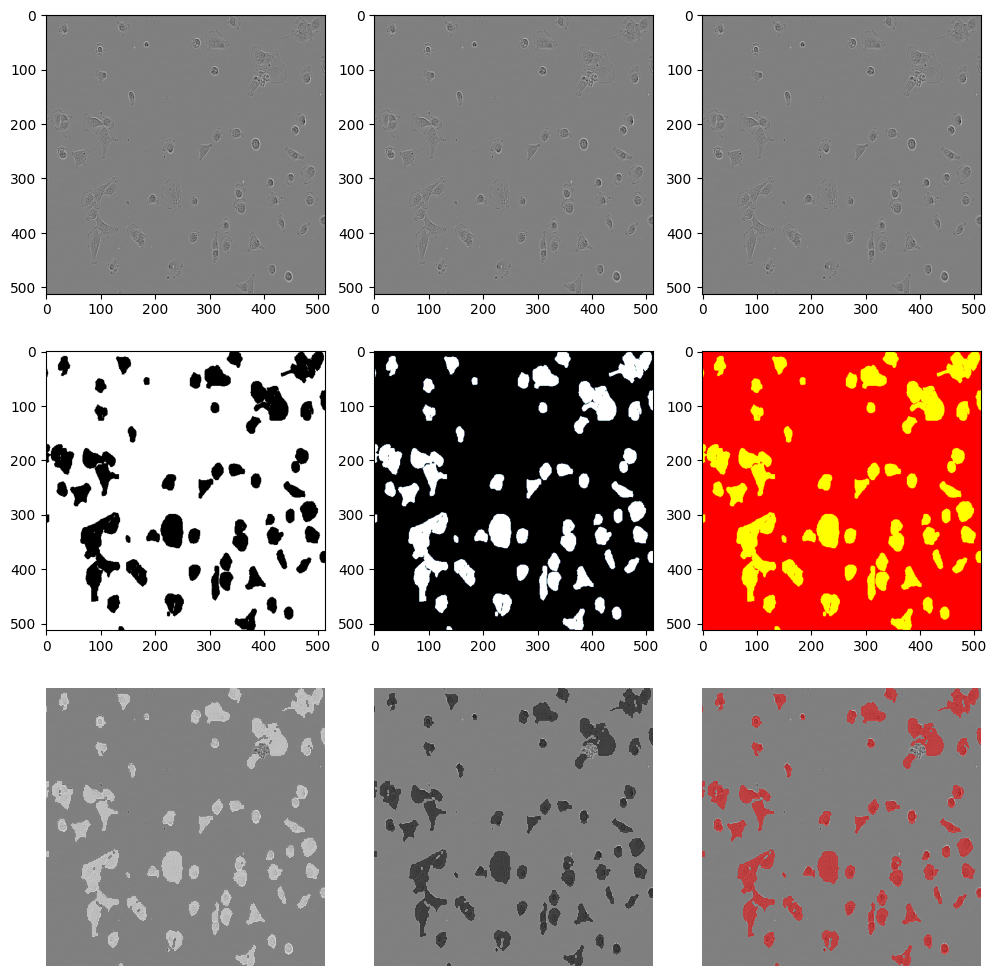

In [29]:
img, mask = dataset[2]
img = img.permute(1, 2, 0)
mask_ = np.ma.masked_where(mask==0, mask)

fig, axis = plt.subplots(3, 3, figsize=(10, 10))

# row 1
axis[0, 0].imshow(img, cmap="gist_yarg")
axis[0, 1].imshow(img, cmap="bone")
axis[0, 2].imshow(img, cmap="autumn")

# row 2
axis[1, 0].imshow(mask[0], cmap="gist_yarg")
axis[1, 1].imshow(mask[0], cmap="bone")
axis[1, 2].imshow(mask[0], cmap="autumn")

# row 3
axis[2, 0].imshow(img, cmap="bone")
axis[2, 0].imshow(mask_[0], alpha=0.5, cmap="gist_yarg")
axis[2, 0].axis("off")

axis[2, 1].imshow(img, cmap="bone")
axis[2, 1].imshow(mask_[0], alpha=0.5, cmap="bone")
axis[2, 1].axis("off")

axis[2, 2].imshow(img, cmap="bone")
axis[2, 2].imshow(mask_[0], alpha=0.5, cmap="autumn")
axis[2, 2].axis("off")

plt.tight_layout()
plt.show()

In [30]:
mask = np.array([0, 1, 0])
mask_ = np.ma.masked_where(mask==0, mask)
mask_

masked_array(data=[--, 1, --],
             mask=[ True, False,  True],
       fill_value=999999)

In [52]:
from torchvision.utils import make_grid
from torch.utils.data import DataLoader

# init loader
torch.manual_seed(101)
train_loader = DataLoader(dataset, batch_size=100, shuffle=True)

# grab first batch of images
for images, masks in train_loader:
    break

grid_img = make_grid(images[:2], nrow=2)
grid_mask = make_grid(masks[:2], nrow=2)
print("Grid images", grid_img.shape)
print("Grid masks", grid_mask.shape)

Grid images torch.Size([3, 516, 1030])
Grid masks torch.Size([3, 516, 1030])


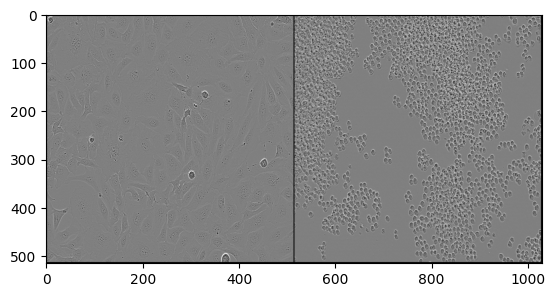

In [53]:
plt.imshow(np.transpose(grid_img.numpy(), (1, 2, 0)));

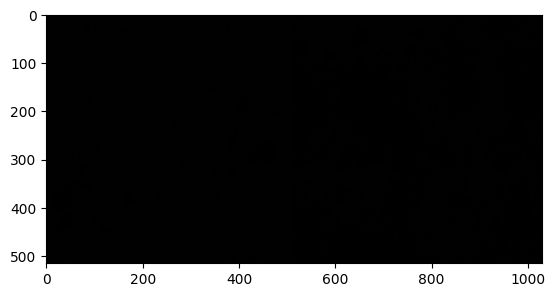

In [54]:
plt.imshow(np.transpose(grid_mask.numpy(), (1, 2, 0)));